In [ ]:
from qiskit import *
import numpy as np
from math import *
from qiskit.tools.monitor import *
from qiskit.tools.visualization import *
provider = IBMQ.load_account()

# Question 1: Qiskit 버전 확인하는 방법은 어떤것이 있을까요?

In [ ]:
import qiskit
qiskit.__qiskit_version__

In [ ]:
import qiskit.tools.jupyter
%qiskit_version_table 

# Question 2: 양자회로의 깊이 (depth)를 불러오세요

In [ ]:
qc =QuantumCircuit(3,3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.h(2)
qc.cx(2,0)
qc.draw(output='mpl')

##### solution

In [ ]:
print(qc.depth())

# Question 3: 양자회로를 사진과 같이 그릴려면 어떠한 코드를 필요로 할까요?

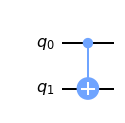

- A. `qc.draw('circuit_drawing.png')`
- B. `qc.write_drawing(format='png', name ='circuit_drawing')`
- C. `qc.draw('latex', filename ='circuit_drawing.png')`
- D. `qc.draw('mpl', filename ='circuit_drawing.png')`

In [ ]:
qc = QuantumCircuit(2)
qc.cx(0,1)

##### solution

In [ ]:
qc.draw('mpl', filename ='circuit_drawing.png')

# Question 4: 아래 회로에서 나올 수 있는 결과 값은 무엇일까요?

In [ ]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.x(1)
qc.measure([0,1],[0,1])
simulator=Aer.get_backend('qasm_simulator')

- A. {'01': 503, '10':521}
- B. {'00': 503, '11':521}
- C. {'10': 503, '11':521}
- D. {'00': 503, '01':521}

##### solution

In [ ]:
qc.draw('mpl')

In [ ]:
## here is the check
from qiskit.visualization import plot_histogram
job = execute(qc,simulator).result()
counts = job.get_counts()

print(counts)
plot_histogram(counts)

# Question 5: 다음중 회로를 그릴려고 할때 에러를 내보내는 코드는 어떤것일까요?

In [ ]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.h(0)
qc.x(1)
qc.ccx(0,1,2)

- A. qc.draw('text')
- B. qc.draw('mpl')
- C. qc.draw('png')
- D. qc.draw('latex_source')

##### Solution

In [ ]:
qc.draw('text')

In [ ]:
qc.draw('mpl')

In [ ]:
qc.draw('png')

In [ ]:
qc.draw('latex_source')

# Questoin 6: 이 중에서 양자 회로의 최적화 정도를 조절하는 명령어는 무엇일까요?

- A. circuit_level
- B. optimization_level
- C. circuit_optimization
- D. optimize_backend

##### Solution

In [ ]:
# Answer is B.

# B. `optimization_level` optimize the quantum circuit

transpile(qc,optimization_level=3).draw('mpl')

# Question 7: 이중 어떠한 코드를 실행 시키면 사진과 같은 양자 회로를 그릴 수 있을까요?

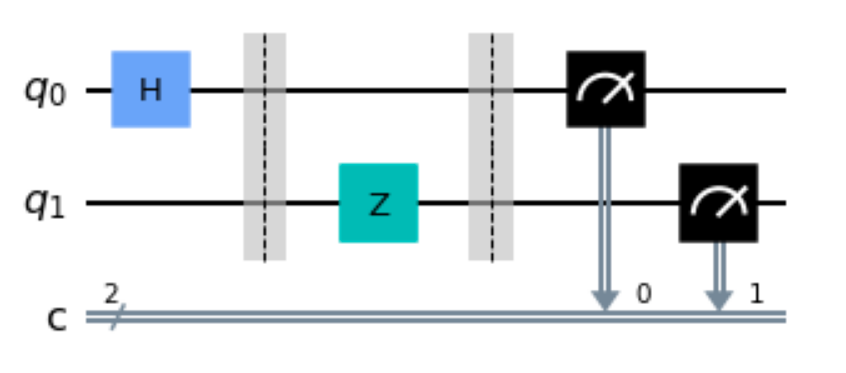

- A.
```
'''
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h.q[0];
barrier (q[0],q[1]);
z.q[1];
barrier (q[0], q[1]);
measure (q[0], c[0]);
measure (q[1], c[1]);
'''
```

- B.
```
qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0] -> c[0])
m += measure(q[1] -> c[1])
qc=qc+m
```

- C.
```
qc = QuantumCircuit(2,2)
qc.h(0)
qc.barrier(0,1)
qc.z(1)
qc.barrier(0,1)
qc.measure([0,1],[0,1])
```

- D.
```
qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0], c[0])
m = measure(q[1], c[1])
qc=qc+m
```

##### Solution

In [ ]:
# A.

'''OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h.q[0];
barrier (q[0],q[1]);
z.q[1];
barrier (q[0], q[1]);
measure (q[0], c[0]);
measure (q[1], c[1]);
'''

In [ ]:
# B

qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0] -> c[0])
m += measure(q[1] -> c[1])
qc=qc+m

In [ ]:
# C is the answer

qc = QuantumCircuit(2,2)
qc.h(0)
qc.barrier(0,1)
qc.z(1)
qc.barrier(0,1)
qc.measure([0,1],[0,1])

In [ ]:
qc.draw('mpl')

In [ ]:
#D
qc = QuantumCircuit(2,2)
qc.h(q[0])
qc.barrier(q[0],q[1])
qc.z(q[1])
qc.barrier(q[0],q[1])
m = measure(q[0], c[0])
m = measure(q[1], c[1])
qc=qc+m

# Question 8: 이 중 어떠한 코드를 실행시키면 사진과 같은 양자회로를 만들 수 있을까요?
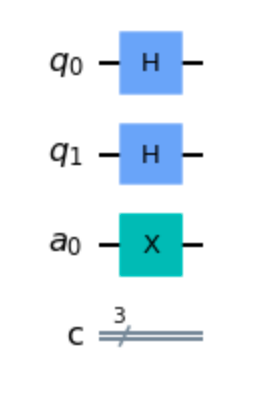

In [ ]:
# A
qr = QuantumRegister(2,'q')
a = QuantumRegister(1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

In [ ]:
qc.draw('mpl')

In [ ]:
# B

qr = QuantumRegister(2,'q')
a = QuantumRegister (1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(cr,a,qr)
qc.h(qr[0:2])
qc.x(a[0])

In [ ]:
qc.draw('mpl')

In [ ]:
#C 
qr = QuantumRegister(2,'q')
a = QuantumRegister (1,'a')
cr = ClassicalRegister(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:1])
qc.x(a[0])

In [ ]:
qc.draw('mpl')

In [ ]:
#D

qr = QReg(2,'q')
a = QReg (1,'a')
cr = CReg(3,'c')
qc = QuantumCircuit(qr,a,cr)
qc.h(qr[0:2])
qc.x(a[0])

##### Solution

A.

# Question 9: 아래와 같이 코드가 주어졌다면 이중 어떠한 코드가 job의 정보에 대해 출력을 할까요? (중복 정답)

In [ ]:
backend= provider.get_backend('ibmq_qasm_simulator')
qr = QuantumRegister(2)
cr= ClassicalRegister(2)
qc = QuantumCircuit(qr,cr)
qc.h(qr[0])
qc.cx(qr[0],qr[1])
qc.measure(qr,cr)
job = execute(qc,backend)

- A. `job_monitor(job)`
- B. `job_monitor(backend)`
- C. `backend.status()`
- D. `job.status()`
- E. `provider.status()`

In [ ]:
# A
job_monitor(job)

In [ ]:
# B
job_monitor(backend)

In [ ]:
# C
backend.status()

In [ ]:
# D
job.status()

In [ ]:
# E
provider.status()

##### Solution

A, D

# Question 10: 이 중 결과값이 Identity matrix, 단위 행렬이 아닌것을 고르세요

\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}

- A

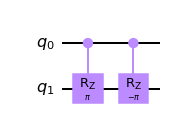

- B

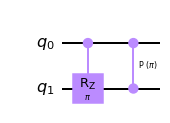

- C

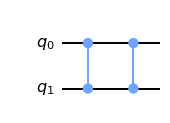

- D

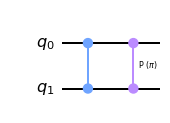

##### Solution

In [ ]:
#A
from qiskit import QuantumCircuit, Aer, execute
from math import pi
qc = QuantumCircuit(2)

qc.crz(pi,0,1)
qc.crz(-pi,0,1)

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()
print(unitary)

In [ ]:
#B
from qiskit import QuantumCircuit, Aer, execute
from math import pi
qc = QuantumCircuit(2)

qc.crz(pi,0,1)
qc.cp(pi,0,1)

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()
print(unitary)

In [ ]:
#C
from qiskit import QuantumCircuit, Aer, execute
from math import pi
qc = QuantumCircuit(2)

qc.cz(0,1)
qc.cz(1,0)

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()

print(unitary)

In [ ]:
#D
from qiskit import QuantumCircuit, Aer, execute
from math import pi
qc = QuantumCircuit(2)


qc.cz(0,1)
qc.cp(pi,0,1)

u_sim = Aer.get_backend('unitary_simulator')
unitary = execute(qc,u_sim).result().get_unitary()
print(unitary)

# Question 11: 아래 코드 중 그림과 같이 양자회로를 그리는 코드는 어떤것이 있을까요?

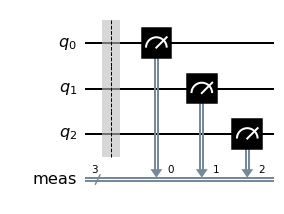

In [ ]:
#A 
qc = QuantumCircuit(3)
qc.measure_all()
qc.draw('mpl')

In [ ]:
#B
qc = QuantumCircuit(3,3)
qc.measure()
qc.draw('mpl')

In [ ]:
#C
qc = QuantumCircuit(3,3)
qc.measure(0,0)
qc.measure(1,1)
qc.measure(2,2)
qc.draw('mpl')

In [ ]:
#D

qc = QuantumCircuit(3,3)
for n in range(len(qc.qubits)):
    qc.measure(n,n)

qc.draw('mpl')

##### Solution


A.

# Question 12: 아래 코드 빈칸에 어떠한 코드를 넣어야 출력값이 나올까요?

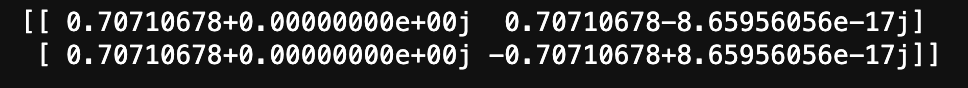

In [ ]:
from qiskit import BasicAer, Aer, execute
qc = QuantumCircuit(1)
qc.h(0)

#insert code fragment here

#A 
simulator = BasicAer.get_backend('unitary_simulator')
result = execute(qc,simulator).result()
unitary = result.get_unitary()

print(unitary)

In [ ]:
#A 
simulator = BasicAer.get_backend('unitary_simulator')
unitary = execute(qc,simulator).get_unitary(qc)

In [ ]:
#B
simulator = Aer.get_backend('unitary_simulator')
result = execute(qc,simulator).result()
unitary = result.get_unitary(qc)

In [ ]:

#C
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc,simulator).result()
unitary = result.get_matrix_result(qc)

In [ ]:
#D
simulator = BasicAer.get_backend('statevector_simulator')
result = execute(qc,simulator).result()
unitary = result.get_unitary(qc)

In [ ]:
#E
simulator = BasicAer.get_backend('unitary_simulator')
result = execute(qc,simulator).result()
unitary = result.get_unitary()

##### Solution

B, E

# Question 13: 아래와 같은 결과 값을 만들 수 있는 코드를 고르세요

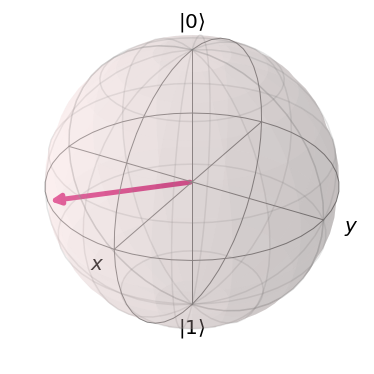

In [ ]:
from qiskit.visualization import plot_bloch_vector
from math import pi, sqrt

# Add code fragment here

plot_bloch_vector(vector)

In [ ]:
#A 
vector = [1,-1,0]

In [ ]:
#B
vector = [pi/2,-pi/4,0]

In [ ]:
#C
vector = [1/sqrt(2),-1/sqrt(2),0]

In [ ]:
#D
vector = [1/sqrt(2),-1/sqrt(2),-1]

##### Solution

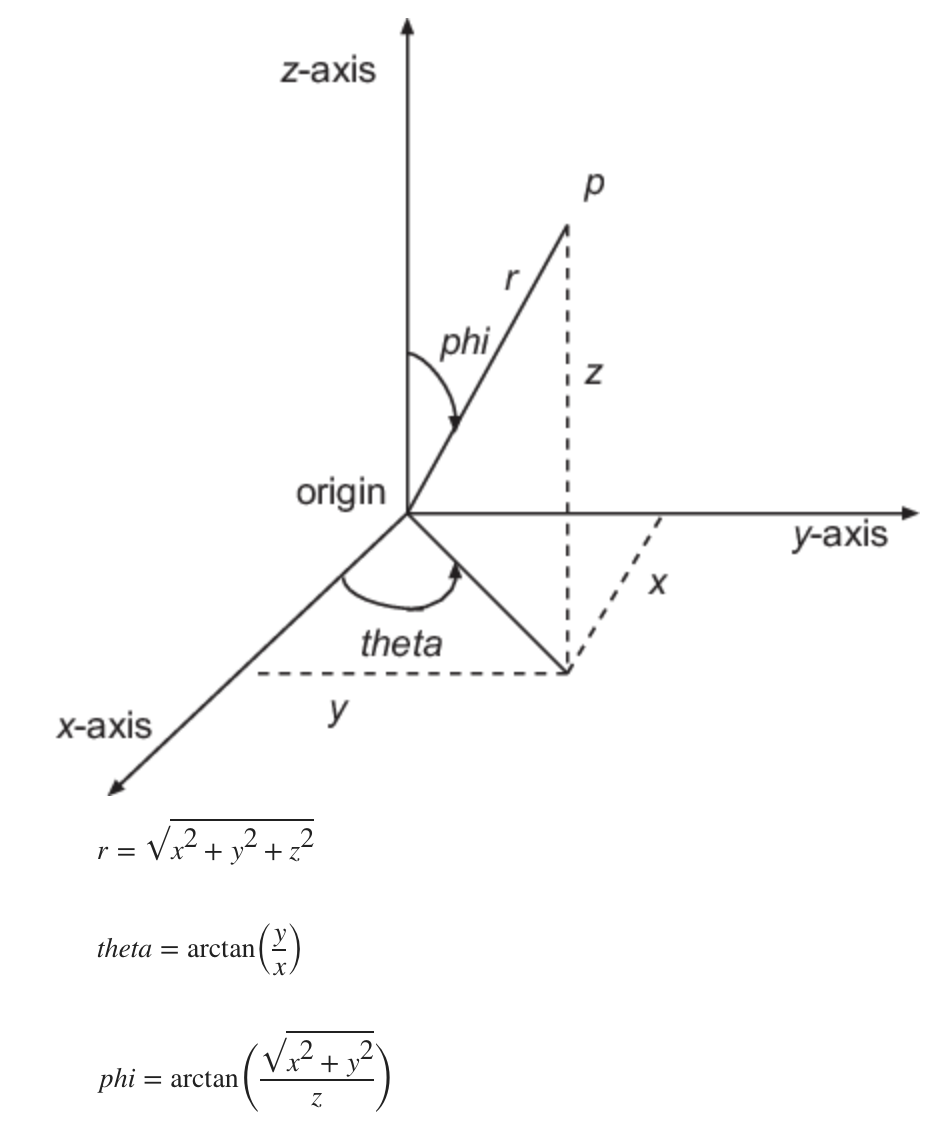

# Question 14: 아래에 어떤 코드를 넣어야 아래와 같은 행렬을 얻을 수 있을까요?

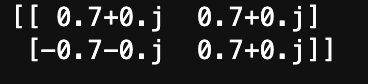

In [ ]:
qc = QuantumCircuit(1)

# Add code fragment here

simulator = Aer.get_backend('unitary_simulator')
job = execute(qc,simulator)
result = job.result()
outputstate = result.get_unitary(qc,1)
print(outputstate)

In [ ]:
#A
qc.h(0)

In [ ]:
#B
qc.h(0)
qc.x(0)

In [ ]:
# C
qc.h(0)
qc.h(0)

In [ ]:
# D
qc.x(0)
qc.h(0)

# Question 15: 아래와 같이 시각화 하여 출력 하려면 어떤 코드를 실행해야 하나요?

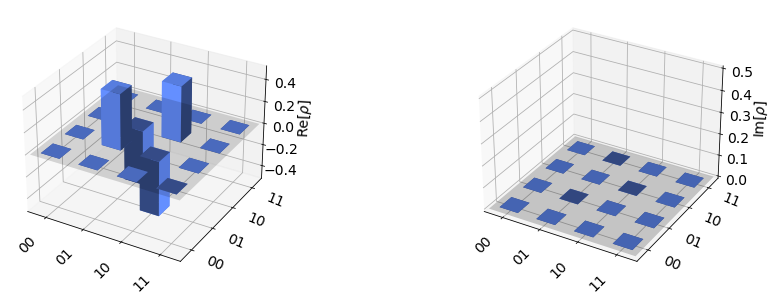

In [ ]:
from qiskit.visualization import plot_state_city, plot_state_hinton, plot_state_paulivec, plot_bloch_multivector, plot_state_qsphere
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0,1)
qc.z(0)

simulator = BasicAer.get_backend('statevector_simulator')
job = execute(qc,simulator).result()
statevector = job.get_statevector()

In [ ]:
# A
plot_state_city(statevector)

In [ ]:
# B
plot_state_hinton(statevector)

In [ ]:
# C
plot_state_paulivec(statevector)

In [ ]:
# D
plot_bloch_multivector(statevector)

In [ ]:
# E
plot_state_qsphere(statevector)

# Question 16: |0> 상태로 양자 회로를 실행한 후 최종 결과 값이 |1> 이 되는 양자 회로는 이 중 어느것일까요?

In [ ]:
#A
qc.ry(pi/2,0)
qc.s(0)
qc.rx(pi/2,0)

In [ ]:
#B
qc.ry(pi/2,0)
qc.rx(pi/2,0)
qc.s(0)

In [ ]:
#C
qc.s(0)
qc.ry(pi/2,0)
qc.rx(pi/2,0)

In [ ]:
#D
qc.rx(pi/2,0)
qc.s(0)
qc.ry(pi/2,0)

##### Solution


In [ ]:
qc = QuantumCircuit(1)

# Add code fragment here


qc.measure_all()

simulator = BasicAer.get_backend('qasm_simulator')
job = execute(qc,simulator).result()
counts = job.get_counts()

print(counts)

# Quesiton 17: 아래 선택지 중에 올바른 것을 모두 고르세요 (2개)

- A. $HXH=Z$
- B. $HYH=X$
- C. $HZH=X$
- D. $ZXZ=Z$
- E. $ZYZ=H$

##### Solution

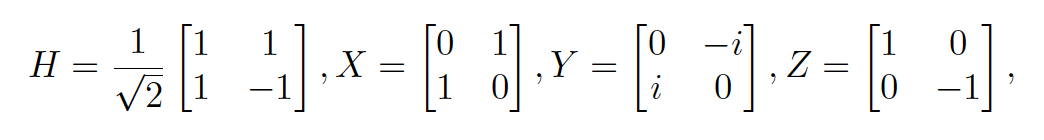

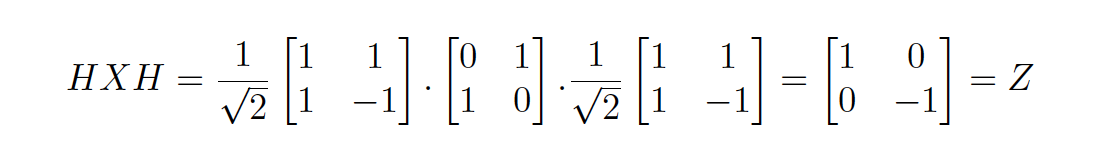

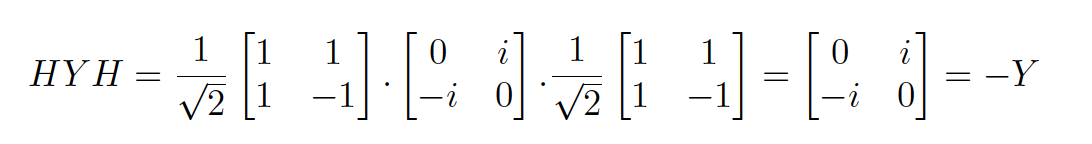

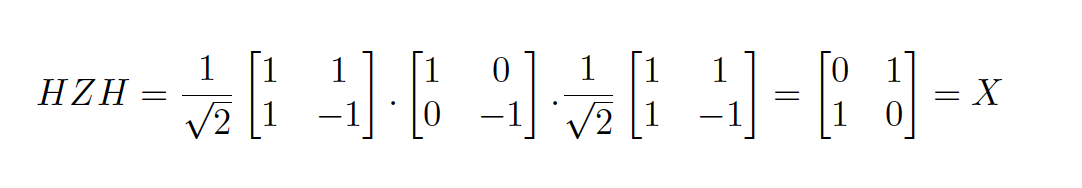

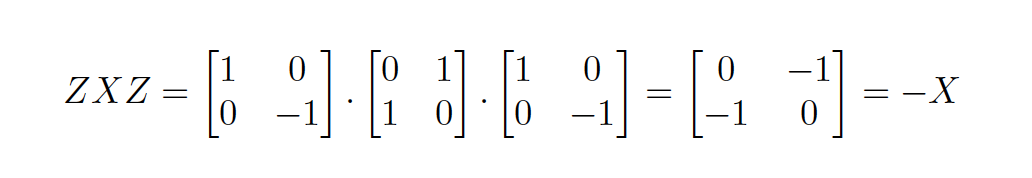

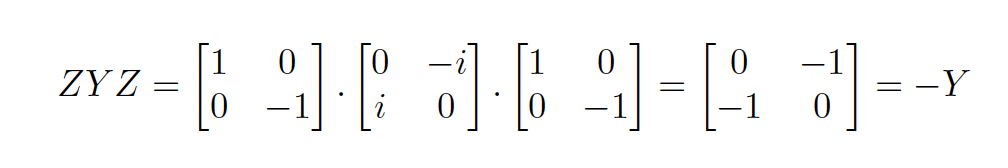

# Question 18: 아래 코드의 양자 회로를 실행했을때 얻는 결과값은 보기중에 어떤것인가요?

In [ ]:
qreg_a = QuantumRegister(2)
qreg_b = QuantumRegister(2)
creg = ClassicalRegister(4)
qc = QuantumCircuit(qreg_a,qreg_b,creg)

qc.x(qreg_a[0])
qc.measure(qreg_a,creg[0:2])
qc.measure(qreg_b,creg[2:4])

- A. `{'00 01': 1024}`
- B. `{'01 00': 1024}`
- C. `{'0001': 1024}`
- D. `{'0100': 1024}`

##### Solution

In [ ]:
qc.draw('mpl')

In [ ]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, sim).result()
counts = result.get_counts(qc)
print(f'counts: {counts}')

# Question 19: 아래와 같이 양자 회로를 출력하세요

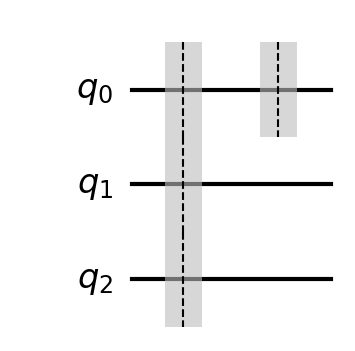

##### Solution

In [ ]:
qc= QuantumCircuit(3)

qc.barrier()
qc.barrier(0)

qc.draw('mpl')

# Question 20: Toffoli gate를 CNOT 게이트를 사용해서 만드세요.

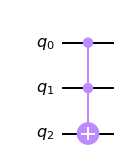

##### Solution

In [ ]:
from qiskit.circuit.library import CXGate

ccx = CXGate().control()

qc = QuantumCircuit(3)

qc.append(ccx,[0,1,2])

qc.draw('mpl')

# Question 21: 아래 양자 회로를 실행했을때 |0>상태가 나올 확률은 몇일까요?

- A. 0.8536
- B. 0.5
- C. 0.1464
- D. 1.0

In [ ]:
qc = QuantumCircuit(1)
qc.ry(pi/4, 0)

##### Solution

In [ ]:
qc.measure_all()
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, sim, shots=1000).result()
counts = result.get_counts()

print(f'counts: {counts}')
print(f'percentage: {counts["0"]/1000}')

Reference: [Murogrande's repository](https://github.com/murogrande/IBM-cert-exam-study-questions)